### 5. Rozkłady kapitału gracza po n krokach
Proszę zasymulować proces ruiny gracza z łącznymi kapitałami początkowymi a = b = 50 i p = 1/2 i 1/5.

Proszę wyznaczyć rozkład kapitału gracza A po n krokach rozgrywki w trzech przypadkach:
n = 10, L_śr/2, 0.9 L_śr
gdzie L_śr to średnia długość trwania rozgrywki wyznaczona w poprzednich zadaniach.

In [55]:
import matplotlib.pyplot as plt
import numpy as np

In [56]:
def simulate_ruin(capital_a: int, capital_b: int, p: float, max_steps: int) -> tuple[int, int]:
    """
    p - probability of player A taking 1$ from player B
    """
    step = 0
    while capital_a != 0 and capital_b != 0 and step < max_steps:
        step += 1
        if np.random.rand() < p:
            capital_a += 1
            capital_b -= 1
        else:
            capital_a -= 1
            capital_b += 1

    return capital_a, capital_b

In [57]:
string_ps = ["0.2", "0.5"]
ps = list(map(float, string_ps))

# data from the 3rd exercise
mean_durations = {
    ps[0]: 83,
    ps[1]: 2508
}

data = {
    ps[0]: [10, mean_durations[ps[0]]//2, int(mean_durations[ps[0]] * 0.9)],
    ps[1]: [10, mean_durations[ps[1]]//2, int(mean_durations[ps[1]] * 0.9)]
}

Struktura danych przechowująca wyniki:

In [58]:
{p: {n: [] for n in data[p]} for p in ps}

{0.2: {10: [], 41: [], 74: []}, 0.5: {10: [], 1254: [], 2257: []}}

In [59]:
results = {p: {n: [] for n in data[p]} for p in ps}
n_games = 1000
capital_a = capital_b = 50

for p, lenghts_p in data.items():
    for length in lenghts_p:
        for _ in range(n_games):
            result_a, _ = simulate_ruin(capital_a, capital_b, p, length)
            results[p][length].append(result_a)

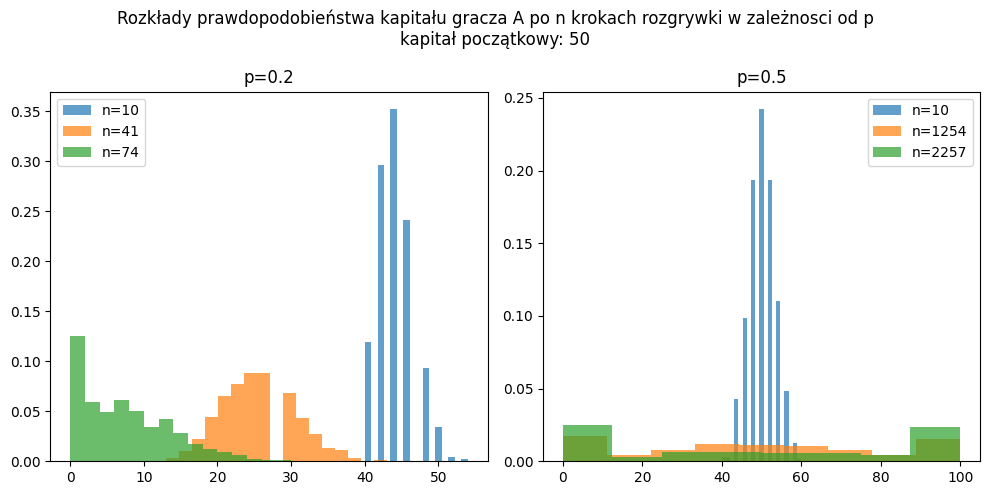

In [87]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle("Rozkłady prawdopodobieństwa kapitału gracza A po n krokach rozgrywki w zależnosci od p\nkapitał początkowy: 50")

for i, (p, lenghts_p) in enumerate(data.items()):
    for length in lenghts_p:
        capital_results = results[p][length]
        mean_length = np.mean(capital_results)
        std_length = np.std(capital_results)

        bin_width = 3.49 * std_length / np.cbrt(len(capital_results)) # Scott's normal reference rule
        n_bins = np.ceil((max(capital_results) - min(capital_results)) / bin_width).astype(int)

        axes[i].hist(capital_results, bins=n_bins, density=True, alpha=0.7, label=f"n={length}")
        axes[i].set_title(f"p={p}")
    axes[i].legend()

plt.tight_layout()